In [1]:
from PIL import Image
import numpy as np
import os
import sys

In [2]:
import glob  #file pattern matching


In [3]:
print(os.getcwd())

C:\Users\pramo\Downloads\face-to-bmi\Data


#to resize all the images to 150*150 size
width=150
height=150
img_num=0
for filename in glob.glob('Images/*.bmp'): #the pattern matches every pathname inthe directory test_images 
    im=Image.open(filename).convert('L')#pillow to load image and convert to greyscale image
    out=im.resize((width,height),Image.ANTIALIAS)
    out.save("C:/Users/pramo/Downloads/face-to-bmi/Data/Resize_images/img_{}.bmp".format(img_num))
    img_num+=1
   

In [4]:
image_list=[]
for filename in glob.glob('Resize_images/*.bmp'): #the pattern matches every pathname inthe directory test_images 
    img=Image.open(filename)#pillow to load image
    image_list.append(img)#adding images to image_list


In [5]:
len(image_list)

4206

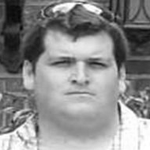

In [6]:
image_list[67]

In [7]:
#to find max size picture
maxx=0
count=0
for pic in image_list:
    arr=np.array(pic)#to convert image to array 
    #print(arr.shape)
    if(str(arr.shape)!='(52, 41)'):
        count+=1
print(count)
    #if(maxx<arr.size):
     #   maxx=arr.size
      #  string=str(arr.shape)
    #print(arr_1d)
    #X_img= np.vstack([X_img, arr_1d])
#print(maxx,string)      

4206


In [8]:
meeee=np.array(image_list[0])
meee=meeee.flatten()
meee.shape

(22500,)

In [9]:
#to find min size picture
minn_x=np.array(image_list[0])
minn=minn_x.size
img_c=0
for pic in image_list:
    arr=np.array(pic)#to convert image to array 
    if(minn>arr.size):
        print(img_c)
        minn=arr.size
        string_min="hiwdd"
    #print(arr_1d)
    #X_img= np.vstack([X_img, arr_1d])
print(minn) 

22500


In [10]:
x=np.empty([1,3])
a=np.array([[11,2,3]])
b=np.array([[1,22,13]])
a.shape
a=np.append(a,b,axis=0)
#vvv=np.array(image_list[0])
#vvv=vvv.flatten()
#vvv=vvv.reshape(1,22500)
a

array([[11,  2,  3],
       [ 1, 22, 13]])

In [11]:
#to convert images to array=>1d array=>2d array 
#appending all the image vectors to X_img vector
temp=1
for pic in image_list:
    arr=np.array(pic)#to convert image to array 
    arr_1d=arr.flatten()#to convert into 1D array
    arr_2d=arr_1d.reshape(1,22500) #to convert 1D to 2D array
    if(temp==1):
        X_img=arr_2d
        temp=0
    else:
        X_img=np.append(X_img,arr_2d,axis=0)#to add new rows to the X_image data



In [12]:
X_img.shape

(4206, 22500)

In [13]:
#standardising data(setting mean=0,variance=1)
from sklearn.preprocessing import StandardScaler

In [14]:
X_P_img=StandardScaler().fit_transform(X_img)

C:\Users\pramo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:

from sklearn.decomposition import PCA

In [64]:
#princinple components choosen should be 95% of variance
pca=PCA(.95)

In [65]:
#to find out principle components from X_P_img
pca.fit(X_P_img)

PCA(copy=True, iterated_power='auto', n_components=0.85, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [66]:
#no:of principle components
pca.n_components_

46

In [67]:
X_P_img=pca.transform(X_P_img)

In [68]:
X_P_img.shape

(4206, 46)

In [21]:

import pandas as pd
#to read_csv file
data_unclean=pd.read_csv('data.csv')
#to show top 5rows
data_unclean.head()



,Unnamed: 0,bmi,gender,is_training,name
0,0,34.207396,Male,1,img_0.bmp
1,1,26.453720,Male,1,img_1.bmp
2,2,34.967561,Female,1,img_2.bmp
3,3,22.044766,Female,1,img_3.bmp
4,4,37.758789,Female,1,img_4.bmp


In [22]:
#to remove unnamed coloums in data
data=data_unclean.loc[:,~data_unclean.columns.str.contains('^Unnamed')]

data.head()



,bmi,gender,is_training,name
0,34.207396,Male,1,img_0.bmp
1,26.453720,Male,1,img_1.bmp
2,34.967561,Female,1,img_2.bmp
3,22.044766,Female,1,img_3.bmp
4,37.758789,Female,1,img_4.bmp


In [23]:
#should include is_training?
x_train=data.loc[:,['gender']]

x_train.head()


,gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [24]:
from sklearn.preprocessing import LabelEncoder#to convert categorical data to numerical data(gender col)

In [25]:
number=LabelEncoder()


In [26]:
x_train=number.fit_transform(x_train['gender'].astype('str'))

In [27]:
x_train=x_train.reshape(4206,1)

In [80]:
y_train=data.loc[:,['bmi']]
y_train=np.array(y_train)
y_train.shape

(4206, 1)

In [79]:
X_train=np.append(x_train,X_P_img,axis=1)
X_train.shape

(4206, 47)

In [76]:
from sklearn.model_selection import train_test_split


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1)

In [82]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1.0,84.124623,-149.069091,11.936394,64.977415,23.618817,-33.961120,-13.619610,1.645506,-5.563092,...,-16.093137,15.400831,9.798860,-10.880923,6.186301,12.208136,22.731958,4.248257,-17.822008,1.164286
1,1.0,-25.180151,-73.212168,63.407328,20.567067,12.142944,8.967636,18.254347,-4.405745,9.948687,...,-1.285792,0.375902,7.282624,-0.945885,1.510463,1.651638,6.042717,-3.897317,4.619995,9.559555
2,1.0,2.317589,-17.765031,-22.622967,16.777396,-16.128595,-11.337678,0.919184,-0.222899,12.553293,...,-3.506062,-1.853071,-1.328536,0.683305,-2.623748,-3.433299,3.363151,0.869548,-1.155237,0.372710
3,1.0,124.913017,35.643501,15.488229,33.336341,4.217072,-12.968687,2.360101,11.961480,-2.198281,...,-3.435494,1.137852,6.028118,0.324072,-0.444463,-1.527911,-8.897089,3.347740,0.777495,5.135891
4,0.0,-5.602846,-34.456549,25.930050,14.153720,-47.300085,0.060005,31.198489,30.022820,-2.028667,...,8.782737,7.877659,0.869167,18.043349,-10.621388,1.839187,-1.065472,3.733567,17.677654,12.582555
5,0.0,-12.221198,15.076865,-3.567172,12.438881,-2.775631,-43.580978,-7.437203,-26.253805,5.652885,...,-1.071182,10.968406,-4.950489,-7.427646,-16.657612,7.077970,-6.976587,6.277969,-12.469994,-1.339433
6,1.0,103.997452,2.549813,-48.593205,41.090470,14.460955,1.278700,31.837379,15.295082,0.801102,...,-5.998229,1.035579,-4.086865,4.216627,1.433812,-5.504607,4.351443,4.708311,8.657598,2.131880
7,0.0,55.845304,-2.439377,-28.943718,-76.075599,28.322858,-21.559196,-31.851204,12.302361,-57.420069,...,-11.708554,-0.725255,21.410961,-12.246013,-5.928390,4.271893,-6.928739,10.436585,3.533023,-0.239987
8,0.0,52.986464,-5.183516,21.457737,-4.661147,14.065587,64.732819,-50.037607,62.338591,-9.596018,...,-0.001624,-5.210890,7.977311,11.232703,2.794290,-16.455884,-5.293810,-3.407739,-9.053100,-13.593045
9,0.0,-11.303597,-32.941277,45.190877,26.721911,-4.363572,16.662692,42.797214,-36.164305,27.636524,...,8.679464,1.403124,11.470489,-4.568790,-9.526945,0.783485,4.891554,19.803291,21.691390,0.924395


In [83]:
X_test.shape

(842, 47)

In [84]:
X_train.shape

(3364, 47)

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
linear=LinearRegression()

In [87]:
model=linear.fit(X_train,y_train)

In [88]:
prediction=model.predict(X_test)

In [89]:
prediction

array([[32.07602009],
       [31.89197301],
       [31.23873235],
       [32.28954257],
       [32.09170949],
       [32.55972799],
       [33.12284434],
       [34.11850947],
       [31.51149492],
       [34.24854   ],
       [32.59591458],
       [33.28598342],
       [32.78556208],
       [31.55494642],
       [33.05298083],
       [32.67827945],
       [31.52828817],
       [31.38845852],
       [33.10378037],
       [34.05637066],
       [31.60206491],
       [31.43441777],
       [32.83825249],
       [29.96868804],
       [34.17827649],
       [34.06970488],
       [32.92976565],
       [32.35158273],
       [33.03578895],
       [34.03066906],
       [32.79265886],
       [32.39700682],
       [32.52245932],
       [33.2686031 ],
       [32.10673623],
       [31.29833186],
       [33.33722398],
       [34.69365677],
       [34.58472794],
       [31.78884577],
       [32.95551684],
       [33.15109171],
       [32.32516141],
       [35.7178422 ],
       [33.94710826],
       [31

In [90]:
score=model.score(X_test,y_test)


In [91]:
print("score on linear regression:{}".format(score))

score on linear regression:-0.025070519637068855


In [92]:
from  matplotlib import pyplot as plt 

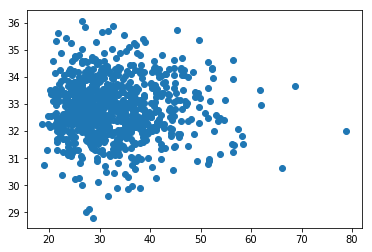

In [93]:
plt.scatter(y_test,prediction)

In [60]:
plt_y_test=pd.DataFrame(y_test)